In [38]:
import os
import pandas as pd

TRAINING_DATA_PATH = os.path.join('data', 'NSL-KDD')

def load_training_data(training_data_path):
    csv_path = os.path.join(training_data_path, 'kdd-train.csv')
    return pd.read_csv(csv_path)

packets = load_training_data(TRAINING_DATA_PATH)

last_row = len(packets)
packets = packets.drop(packets.index[last_row - 1])
del packets['idk']

packets['duration'] = pd.to_numeric(packets['duration'])

In [39]:
packets.info()
packets.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125973 entries, 0 to 125972
Data columns (total 42 columns):
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null float64
dst_bytes                      125973 non-null float64
land                           125973 non-null float64
wrong_fragment                 125973 non-null float64
urgent                         125973 non-null float64
hot                            125973 non-null float64
num_failed_logins              125973 non-null float64
logged_in                      125973 non-null float64
num_compromised                125973 non-null float64
root_shell                     125973 non-null float64
su_attempted                   125973 non-null float64
num_root                       125973 non-null float64
num_file_creat

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_Count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_Rate,dst_host_rerror_Rate,dst_host_srv_rerror_rate,class
125968,0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,1.0
125969,8,udp,private,SF,105.0,145.0,0.0,0.0,0.0,0.0,...,244.0,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,0.0
125970,0,tcp,smtp,SF,2231.0,384.0,0.0,0.0,0.0,0.0,...,30.0,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,0.0
125971,0,tcp,klogin,S0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,1.0
125972,0,tcp,ftp_data,SF,151.0,0.0,0.0,0.0,0.0,0.0,...,77.0,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,0.0


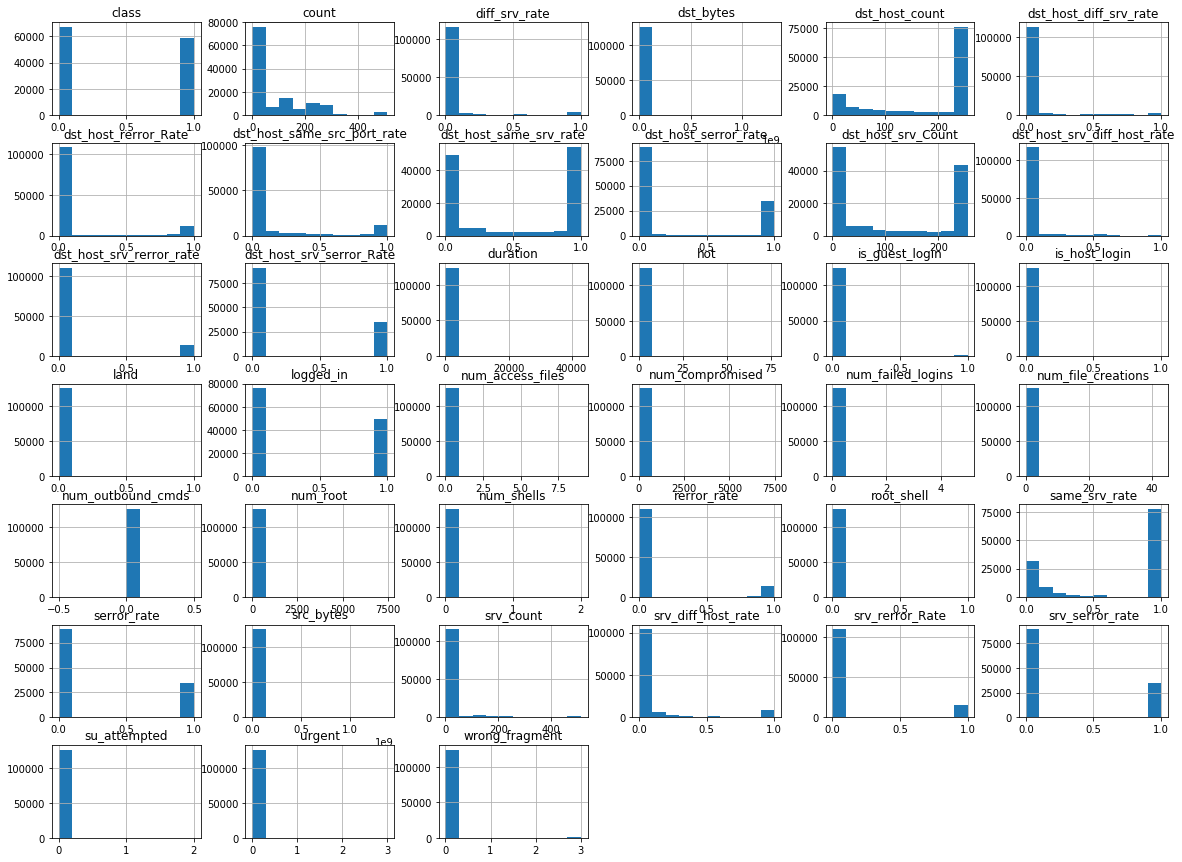

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
packets.hist(bins=10, figsize=(20,15))
plt.show()

In [41]:
def one_hot_encode_columns(data, column):
    one_hot_encode = pd.get_dummies(packets[column])
    data = data.drop(column, axis=1)
    data = data.join(one_hot_encode)
    return data
    
packets = one_hot_encode_columns(packets, 'protocol_type')
packets = one_hot_encode_columns(packets, 'service')
packets = one_hot_encode_columns(packets, 'flag')

In [42]:
def generate_numpy_arr(dataset, classification):
    classification_arr = dataset[classification].values
    dataset_arr = dataset.values
    
    return dataset_arr, classification_arr

packets_arr, classification_arr = generate_numpy_arr(packets, 'class')
packets_arr

array([[  0.00000000e+00,   4.91000000e+02,   0.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.46000000e+02,   0.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   2.23100000e+03,   3.84000000e+02, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.51000000e+02,   0.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00]])